# Taiwan Credit: Clustering, t-SNE, PCA, XGBoost

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
%cd /content/gdrive/MyDrive/Github/ml-blog

/content/gdrive/MyDrive/Github/ml-blog


In [3]:
# !pip install xlrd==1.2.0
!pip install matplotlib==3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xlrd


filename = 'taiwan-credit-col-transform-FULL.csv'

DATA = os.path.relpath('/content/gdrive/MyDrive/Github/ml-blog/credit/data/' + filename)

df = pd.read_csv(DATA, header=0, index_col='ID')
df.head()


,category__SEX_1,category__SEX_2,category__EDUCATION_0,category__EDUCATION_1,category__EDUCATION_2,category__EDUCATION_3,category__EDUCATION_4,category__EDUCATION_5,category__EDUCATION_6,category__MARRIAGE_0,...,nums__BILL_AMT4,nums__BILL_AMT5,nums__BILL_AMT6,nums__PAY_AMT1,nums__PAY_AMT2,nums__PAY_AMT3,nums__PAY_AMT4,nums__PAY_AMT5,nums__PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category__SEX_1             30000 non-null  float64
 1   category__SEX_2             30000 non-null  float64
 2   category__EDUCATION_0       30000 non-null  float64
 3   category__EDUCATION_1       30000 non-null  float64
 4   category__EDUCATION_2       30000 non-null  float64
 5   category__EDUCATION_3       30000 non-null  float64
 6   category__EDUCATION_4       30000 non-null  float64
 7   category__EDUCATION_5       30000 non-null  float64
 8   category__EDUCATION_6       30000 non-null  float64
 9   category__MARRIAGE_0        30000 non-null  float64
 10  category__MARRIAGE_1        30000 non-null  float64
 11  category__MARRIAGE_2        30000 non-null  float64
 12  category__MARRIAGE_3        30000 non-null  float64
 13  category__PAY_0_-2          300

## Split Features from Target

In [6]:
X = df.iloc[:, :91]
y = df.iloc[:, 91]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## k-Means Clustering

In [9]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=200, random_state=42).fit(X_train)

In [12]:
kmeans.labels_

array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

In [13]:
kmeans.cluster_centers_

array([[ 4.17844954e-01,  5.82155046e-01,  8.12611734e-05,
         2.47196490e-01,  5.47537786e-01,  1.91695108e-01,
         2.60035755e-03,  9.10125142e-03,  1.78774582e-03,
         1.46270112e-03,  4.13456850e-01,  5.70372176e-01,
         1.47082724e-02,  3.57549163e-03,  3.91678856e-02,
         7.16804811e-01,  9.58069235e-02,  1.24654640e-01,
         1.34080936e-02,  3.73801398e-03,  1.05639525e-03,
         7.31350561e-04,  2.43783520e-04,  8.12611734e-04,
         2.92540224e-03,  2.85226719e-02,  7.74906550e-01,
         2.43783520e-04,  1.71542337e-01,  1.47082724e-02,
         4.38810336e-03,  1.54396229e-03,  3.25044694e-04,
         8.12611734e-04,  8.12611734e-05,  2.11279051e-03,
         2.34844791e-02,  7.93027791e-01,  6.46455545e-18,
         1.65691533e-01,  1.03201690e-02,  3.41296928e-03,
         6.50089387e-04,  8.12611734e-04,  4.06305867e-04,
         8.12611734e-05,  1.11327808e-02,  2.38907850e-02,
         8.05135706e-01,  3.23227773e-18,  1.47651552e-0

In [14]:
centroids = kmeans.cluster_centers_

## Principal Component Analysis

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, svd_solver='full', random_state=42)
X_train_pca = pca.fit_transform(X_train)

In [9]:
pca.n_components_, pca.explained_variance_ratio_

(20, array([0.31276021, 0.10782326, 0.06587984, 0.05364649, 0.04816681,
        0.04707598, 0.04444691, 0.04225687, 0.03764683, 0.03478326,
        0.03199972, 0.02484783, 0.01931047, 0.01697422, 0.01508443,
        0.0130426 , 0.01144823, 0.00902609, 0.00728325, 0.0066213 ]))

In [10]:
X_train_pca.shape

(24000, 20)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


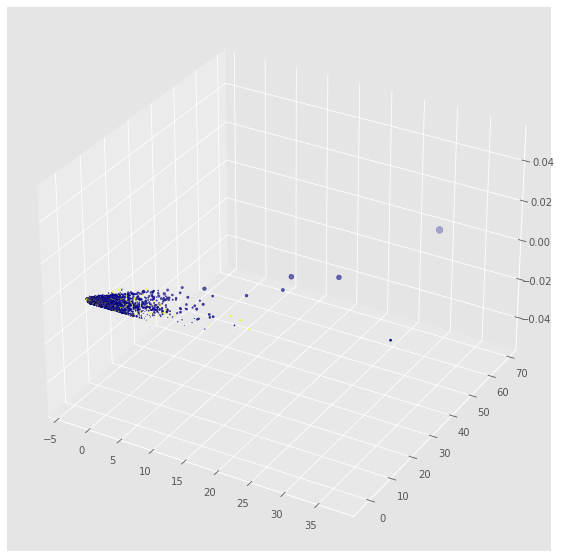

In [11]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='plasma')
plt.show()

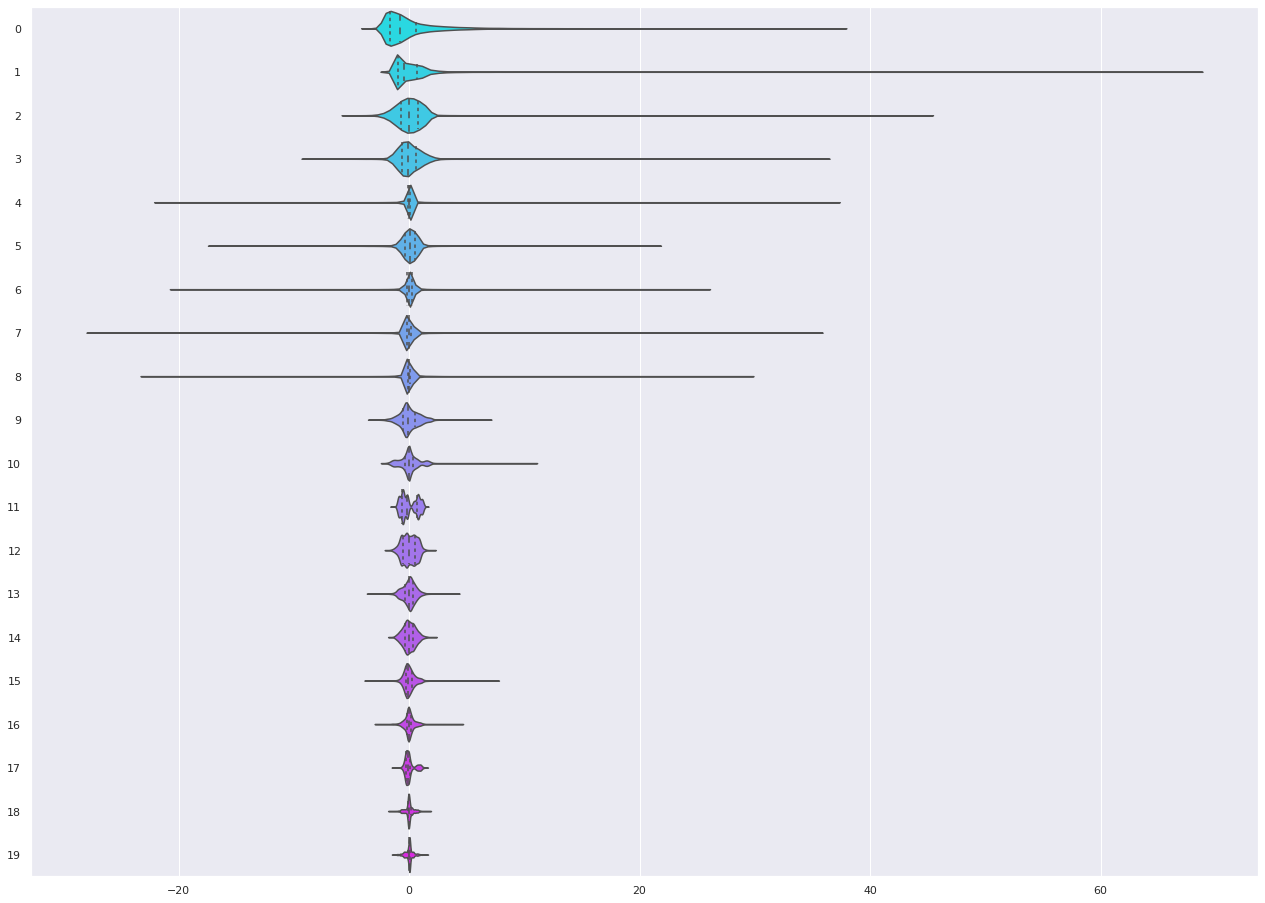

In [14]:
sns.set_theme(style='darkgrid')
sns.set(rc={'figure.figsize':(22,16)})

sns.violinplot(data=X_train_pca, palette="cool", as_cmap=True, scale='width', inner="quartile", orient="h")
plt.savefig('pca_20_violin.png')